In [71]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [72]:
# выгрузим очищенный датасет
estate_data = pd.read_csv('final_dataset.csv')

In [73]:
estate_data.head()

,status,propertyType,fireplace,city,target,Pool,Year_built,remodeled,heating,Parking,lotsize,price/sqm,average_school_rating,number_of_schools,average_distance_to_school,sqm,bathrooms,sqm^2,sqm_price/sqm,price/sqm^2
0,for sale,single-family,0.0,other,310000.0,0.0,2019.0,0.0,no_info,no_provided,541.0,1711.0,4.0,3.0,2.08,181.0,more_than_2,32761.0,309691.0,2927521.0
1,for sale,townhouse,0.0,Philadelphia,209000.0,0.0,1920.0,0.0,forced air,no_provided,63.0,2508.0,5.0,3.0,3.20,83.0,no_provided,6889.0,208164.0,6290064.0
2,no_provided,single-family,0.0,Houston,311995.0,0.0,2019.0,0.0,gas,attached garage,191.0,1744.0,3.0,3.0,1.76,179.0,more_than_2,32041.0,312176.0,3041536.0
3,new construction,single-family,0.0,other,499900.0,0.0,2019.0,1.0,forced air,attached garage,650.0,2960.0,7.3,3.0,1.76,169.0,2,51984.0,169404.0,552049.0
4,no_provided,single-family,0.0,Houston,168800.0,0.0,1982.0,1.0,other,2 spaces,198.0,743.0,5.3,3.0,2.24,228.0,more_than_2,81796.0,366366.0,1640961.0


In [74]:
# Обработка числовых переменных
numeric_data = ['fireplace', 'target', 'Pool', 'Year_built', 'remodeled', 'lotsize', 'price/sqm', 'average_school_rating', 'number_of_schools', 'average_distance_to_school', 'sqm', 'sqm^2', 'sqm_price/sqm', 'price/sqm^2']

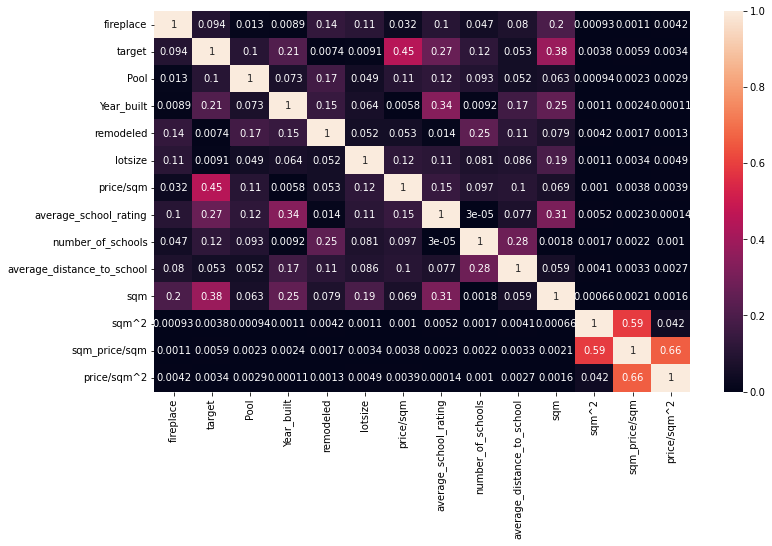

In [75]:
# Оценим корреляцию числовых переменных
plt.figure(figsize = (12, 7))
sns.heatmap(estate_data[numeric_data].corr().abs(), vmin=0, vmax=1, annot = True);

Самая высокая корреляция у признаков price/sqm и sqm

In [76]:
# Обработка категориальных переменных
categorical_data = ['status', 'propertyType', 'city', 'heating', 'Parking', 'bathrooms']

In [77]:
# Применим dummy-кодирование категориальных переменных.
category = pd.get_dummies(estate_data[categorical_data])

In [78]:
# Объединим dummy-переменные с датафреймом estate_data, предварительно удалив из него исходные категориальные признаки.
estate_data = pd.concat([estate_data[numeric_data], category], axis=1)

In [79]:
estate_data

,fireplace,target,Pool,Year_built,remodeled,lotsize,price/sqm,average_school_rating,number_of_schools,average_distance_to_school,...,Parking_attached garage,Parking_detached garage,Parking_more_than_2_spaces,Parking_no_provided,Parking_other,bathrooms_0,bathrooms_1,bathrooms_2,bathrooms_more_than_2,bathrooms_no_provided
0,0.0,310000.0,0.0,2019.0,0.0,541.0,1711.0,4.0,3.0,2.08,...,0,0,0,1,0,0,0,0,1,0
1,0.0,209000.0,0.0,1920.0,0.0,63.0,2508.0,5.0,3.0,3.20,...,0,0,0,1,0,0,0,0,0,1
2,0.0,311995.0,0.0,2019.0,0.0,191.0,1744.0,3.0,3.0,1.76,...,1,0,0,0,0,0,0,0,1,0
3,0.0,499900.0,0.0,2019.0,1.0,650.0,2960.0,7.3,3.0,1.76,...,1,0,0,0,0,0,0,1,0,0
4,0.0,168800.0,0.0,1982.0,1.0,198.0,743.0,5.3,3.0,2.24,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135508,0.0,110000.0,0.0,1945.0,1.0,1133.0,678.0,4.0,3.0,4.32,...,1,0,0,0,0,0,0,0,0,1
135509,0.0,287999.0,0.0,1969.0,1.0,658.0,1625.0,4.0,3.0,1.28,...,0,0,0,0,0,0,0,1,0,0
135510,1.0,384900.0,0.0,1950.0,1.0,904.0,1658.0,5.7,3.0,2.24,...,0,1,0,0,0,0,0,0,1,0
135511,1.0,280000.0,0.0,1970.0,1.0,613.0,1679.0,2.7,3.0,1.12,...,0,1,0,0,0,0,0,0,1,0


In [80]:
# Создадим матрицу наблюдений X и вектор правильных ответов Y
Y=estate_data['target']
X=estate_data.drop('target',axis=1) 

In [81]:
# Разделим выборку на обучающую и тестовую выборки.
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size = 0.3, shuffle = True)

In [82]:
# Определим функцию для расчета метрики MAPE.
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [83]:
# 1. Создаем модель
# 2. Обучаем модель
# 3. Предсказываем значения для выборки
# 4. Для оценки качества решения задачи регрессии будут использовать метрики MAE, MAPE, MSE, R2_score

LR = LinearRegression() 
LR.fit(X_train, y_train)
Y_LR = LR.predict(X_test)

print('MAE:', round(mean_absolute_error(y_test, Y_LR), 3))
print('MAPE:', round(mape(y_test, Y_LR), 3))
print('RMSE:', round(mean_squared_error(y_test, Y_LR)**(1/2),3))
print('R2_score:', round(r2_score(y_test, Y_LR),3))

MAE: 72996.118
MAPE: 11.647
RMSE: 124503.291
R2_score: 0.458



# Интерпритация результов метрик
MAE показывает на сколько наша модель в среднем ошибается на $72996.118 (сумма в долларах) <br>
Оценка ошибки модели в процентах (MAPE) - 11.647 % <br>
Корень из средней квадратической ошибки (RMSE) - 124503.291 <br>
Коэффициент детерминации показывает, что модели близка к удовлетворительному показателю 0.458 <br>

### Выводы





Данная модель может быть применена в продакшене, так как метрики, представленные в проекте показывают близкий к удовлетворительному результат.